# Imports

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme(style='darkgrid')

# Functions

In [2]:
def get_data(steam_id,name):
    response = requests.get(f'https://royale.pet/api/player/{steam_id}/stats')
    # get data
    keys=[]
    groups=[]
    values=[]
    for key in response.json()['stats'].keys():
        keys.append(key)
        groups.append(response.json()['stats'][key]['group'])
        values.append(response.json()['stats'][key]['value'])
    # translate to pandas format
    dd = {'keys':keys,'groups':groups,'values':values,'name':name}
    # build df
    df = pd.DataFrame(dd)
    df = df.sort_values(by='groups')
    response.close()
    
    return df

In [3]:
def gen_plots(merged_df):
    
    # if ./figures DNE, make it

    if not './figures/':
  
    # Create a new directory because it does not exist 
        os.makedirs('./figures/')
    
    ####### WEAPON BREAKDOWN
    plt.rcParams['figure.figsize'] = (5,6)
    plt.rcParams['figure.dpi'] = 400
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Kill Statistics')].sort_values(by='values'))
    plt.title('Weapon Breakdown')
    plt.ylabel('')
    plt.xlabel('Kills')
    plt.savefig('figures/weapons.png',bbox_inches='tight')
    plt.show()
    
    ######## MISCELLANEOUS BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Miscellaneous')].sort_values(by='values'))
    plt.title('Miscellaneous Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    g.set( xscale='log')
    g.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    g.grid(b=True, which='both', color='white', linewidth=0.4,axis='x',ls='dashed')
    g.grid(b=True, which='major', color='white', linewidth=1,axis='x',ls='solid')
    plt.savefig('figures/miscellaneous.png',bbox_inches='tight')
    plt.show()
    
    ######### COMBAT BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Combat')].sort_values(by='values'))
    plt.title('Combat Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    g.set( xscale='log')
    g.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    g.grid(b=True, which='both', color='white', linewidth=0.4,axis='x',ls='dashed')
    g.grid(b=True, which='major', color='white', linewidth=1,axis='x',ls='solid')
    plt.savefig('figures/combat.png',bbox_inches='tight')
    plt.show()
    
    ########## DUOS BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Duos')].sort_values(by='values'))
    plt.title('Duos Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    g.set( xscale='log')
    g.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    g.grid(b=True, which='both', color='white', linewidth=0.4,axis='x',ls='dashed')
    g.grid(b=True, which='major', color='white', linewidth=1,axis='x',ls='solid')
    plt.savefig('figures/duos.png',bbox_inches='tight')
    plt.show()
    
    ######### EVENT BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Event')].sort_values(by='values'))
    plt.title('Event Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    g.set( xscale='log')
    g.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    g.grid(b=True, which='both', color='white', linewidth=0.4,axis='x',ls='dashed')
    g.grid(b=True, which='major', color='white', linewidth=1,axis='x',ls='solid')
    plt.savefig('figures/event.png',bbox_inches='tight')
    plt.show()
    
    ######## SOLOS BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Solo')].sort_values(by='values'))
    plt.title('Solo Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    g.set( xscale='log')
    g.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    g.grid(b=True, which='both', color='white', linewidth=0.4,axis='x',ls='dashed')
    g.grid(b=True, which='major', color='white', linewidth=1,axis='x',ls='solid')
    plt.savefig('figures/solos.png',bbox_inches='tight')
    plt.show()
    
    ######## SQUADS BREAKDOWN
    g = sns.barplot(y="keys", x="values", hue="name", hue_order=['pink','red','green'], palette=['pink','red','green'],edgecolor='k',alpha=0.75,
                data=merged.loc[(merged['groups'] == 'Squads')].sort_values(by='values'))
    plt.title('Squads Breakdown')
    plt.ylabel('')
    plt.xlabel('Value')
    plt.savefig('figures/squads.png',bbox_inches='tight')
    plt.show()

# Plotting

In [4]:
df_gre = get_data(steam_id=76561199037603294,name='green')
df_red = get_data(steam_id=76561198869827899,name='red')
df_pin = get_data(steam_id=76561199037577176,name='pink')

In [5]:
dfs = [df_gre, df_red, df_pin]
merged = pd.concat(dfs)

In [9]:
merged.to_csv('our_stats.csv')

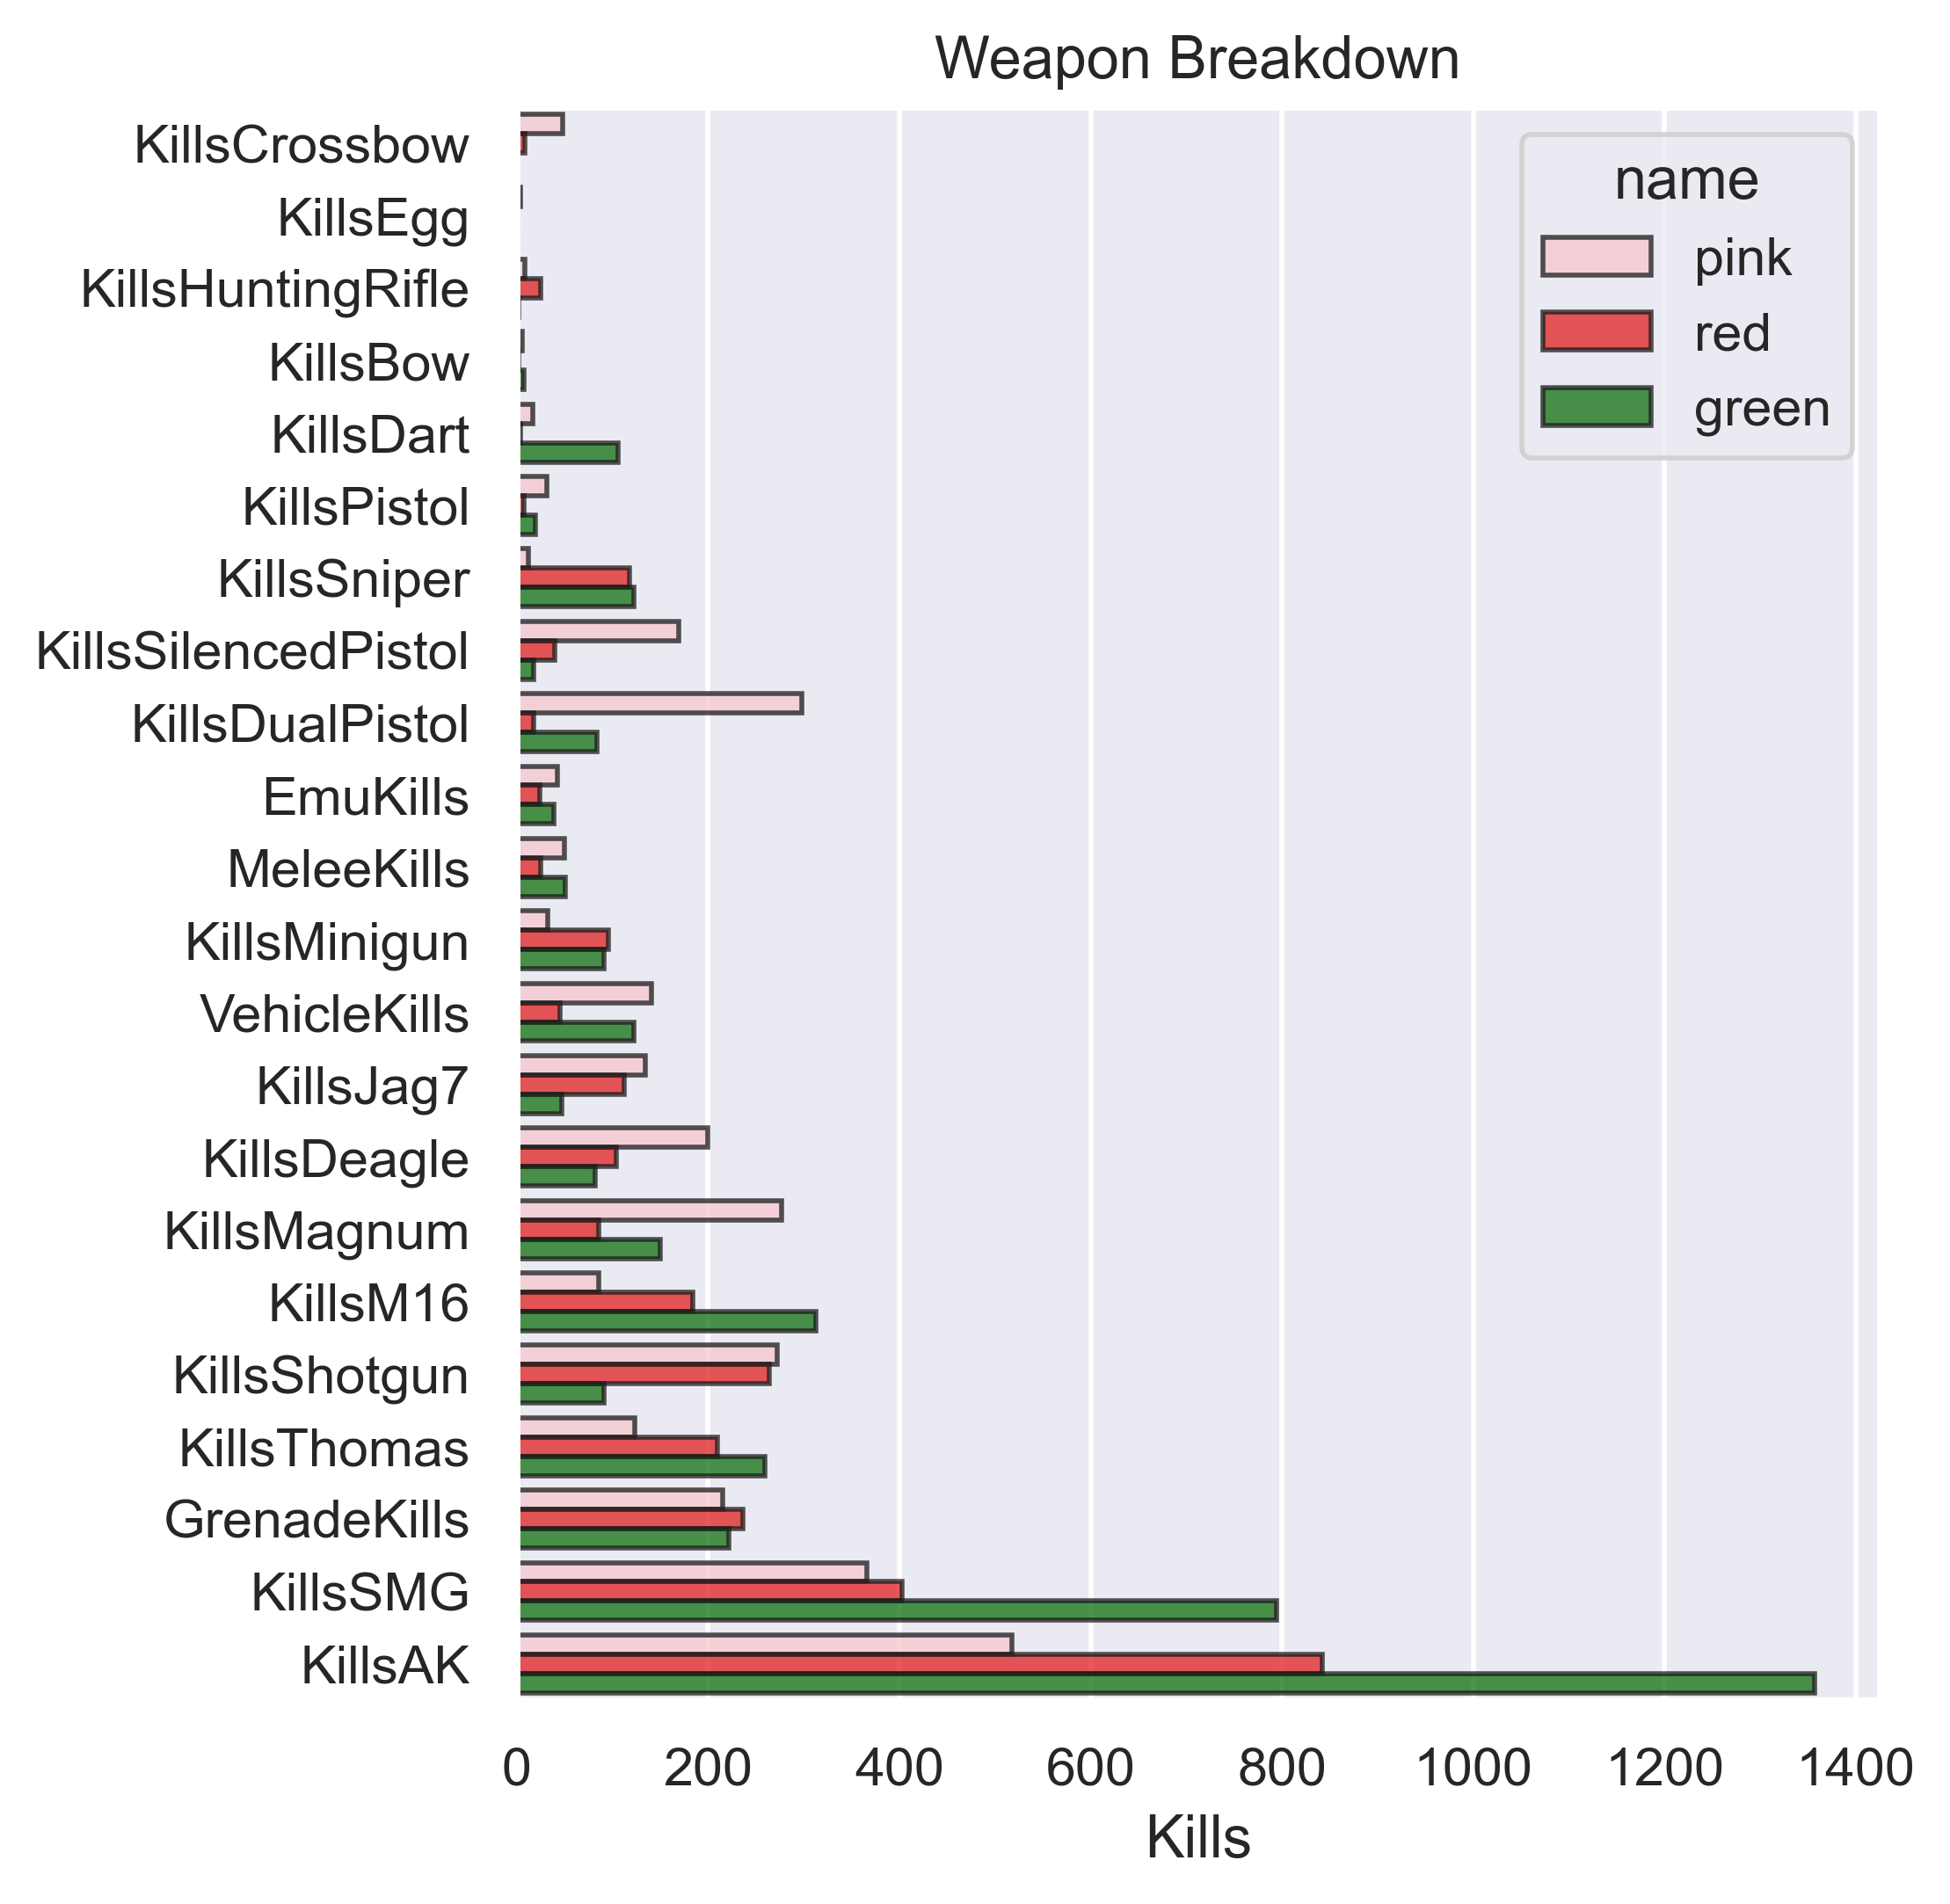

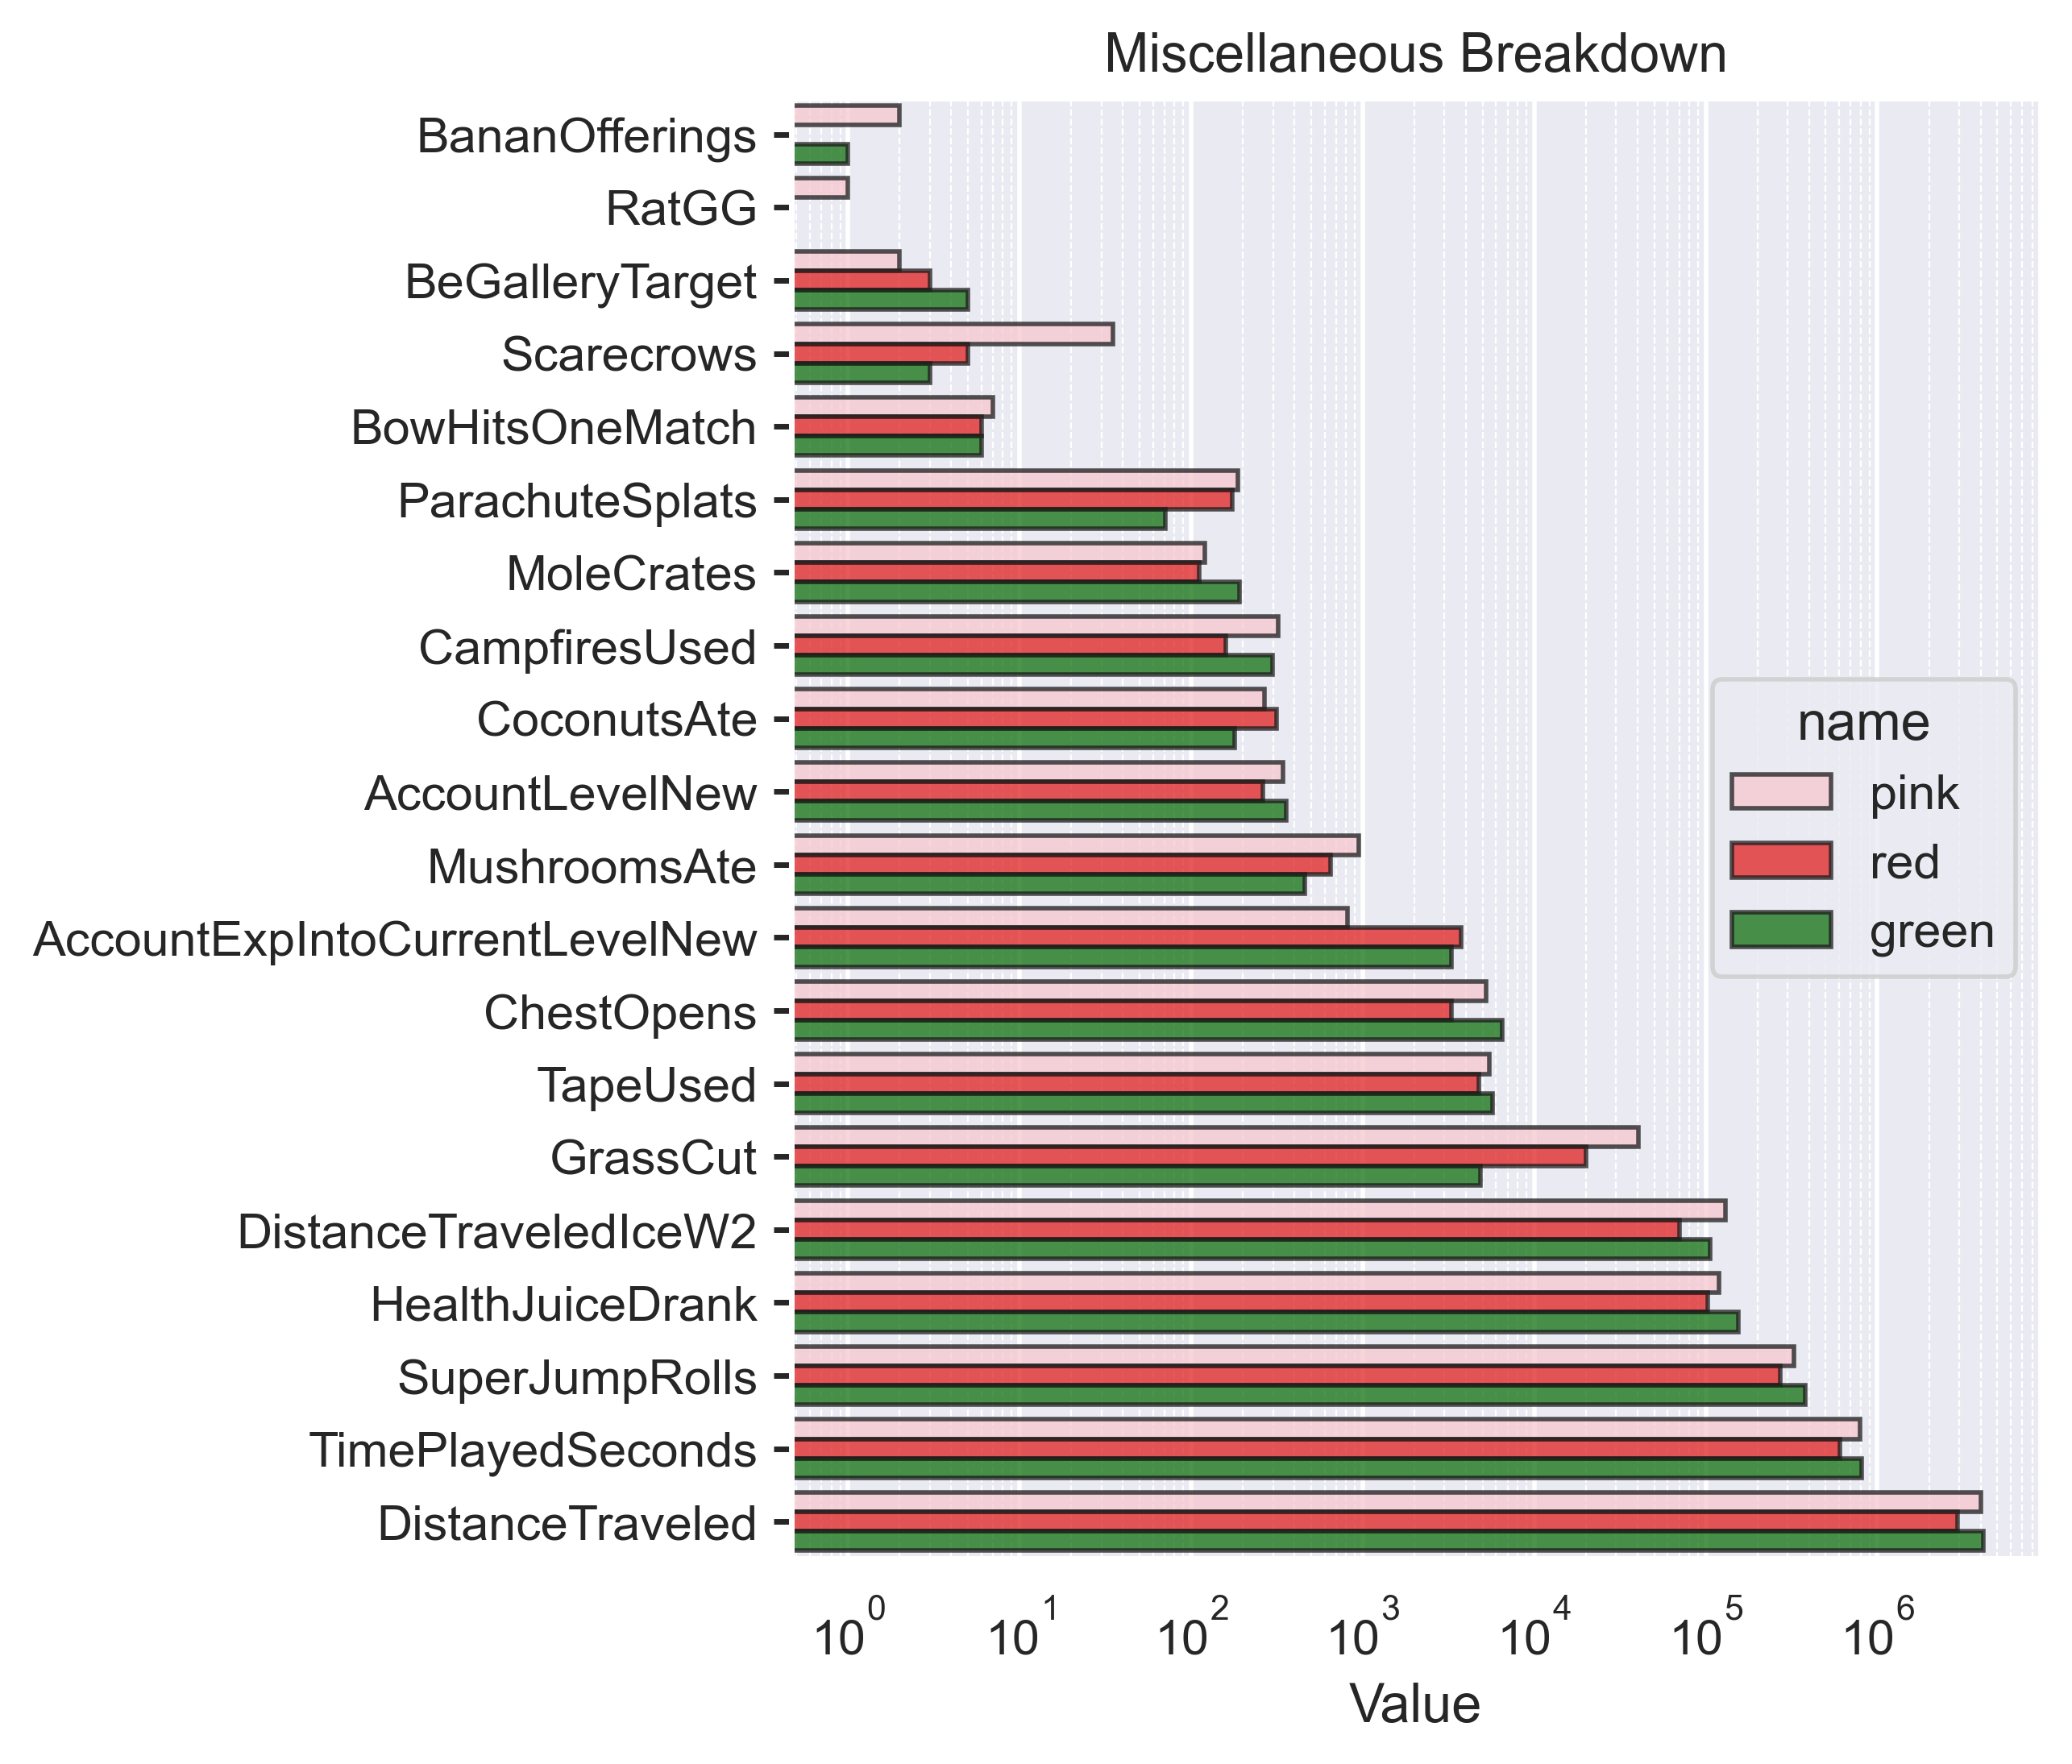

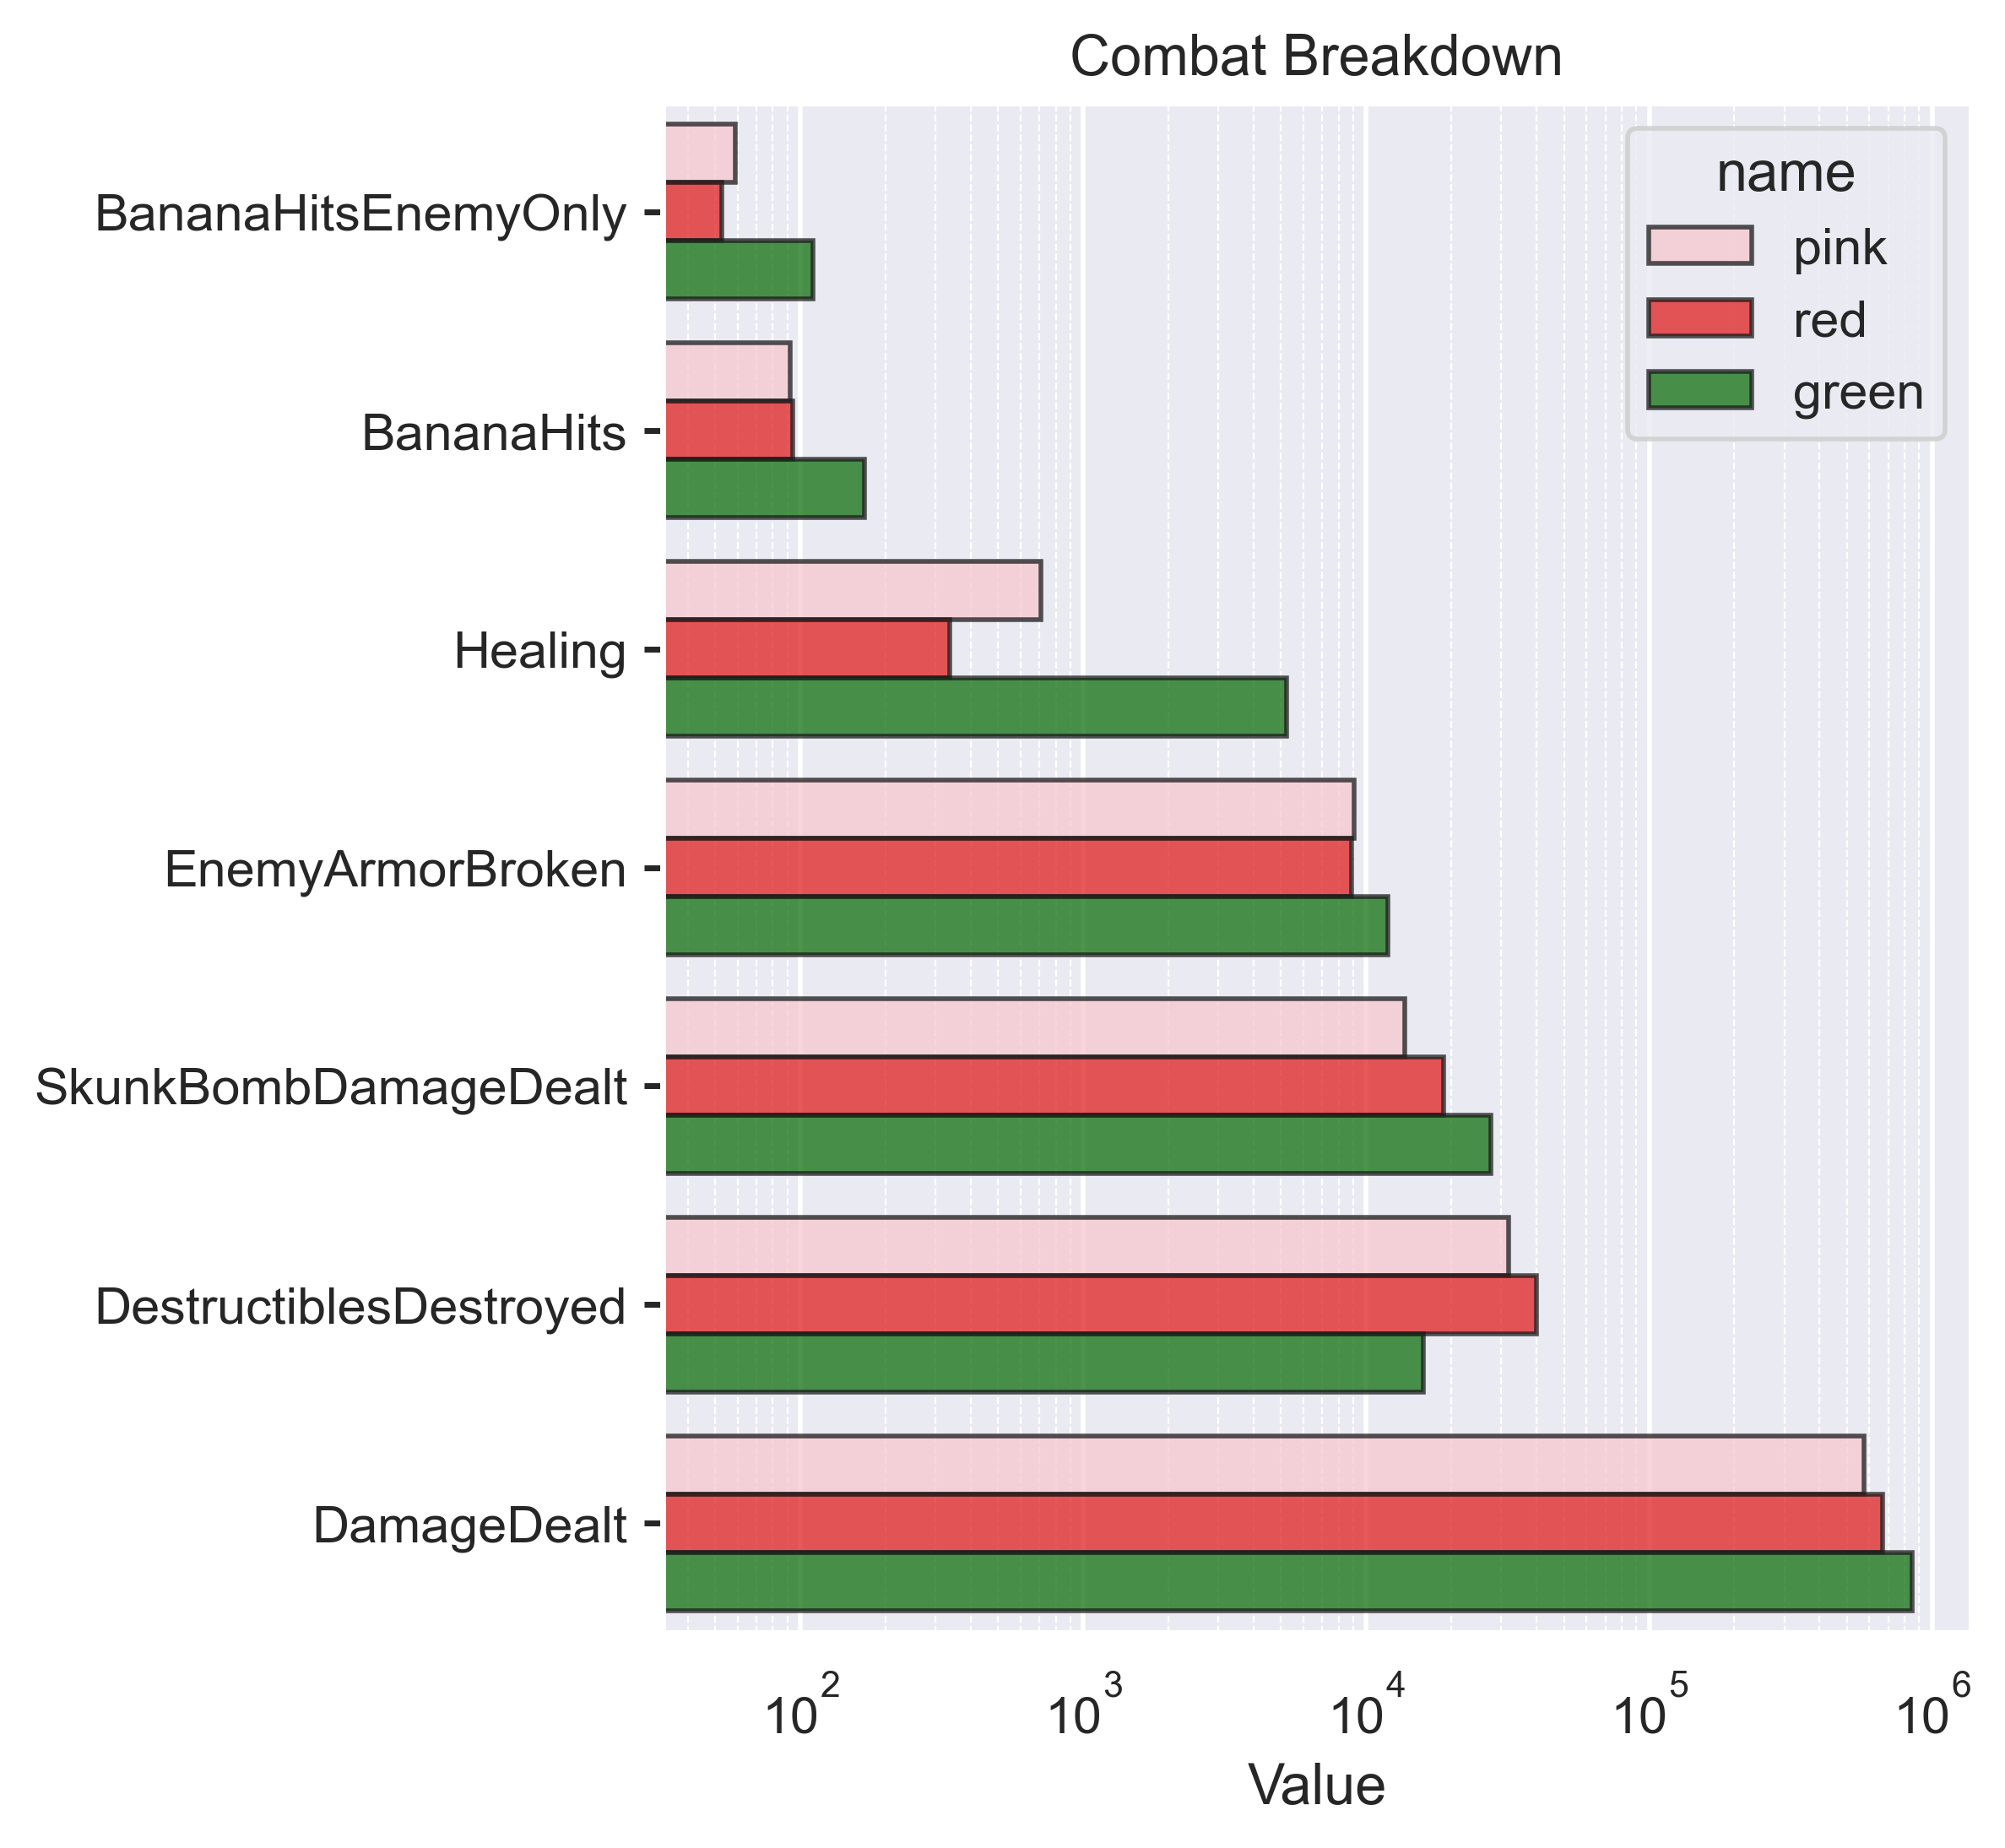

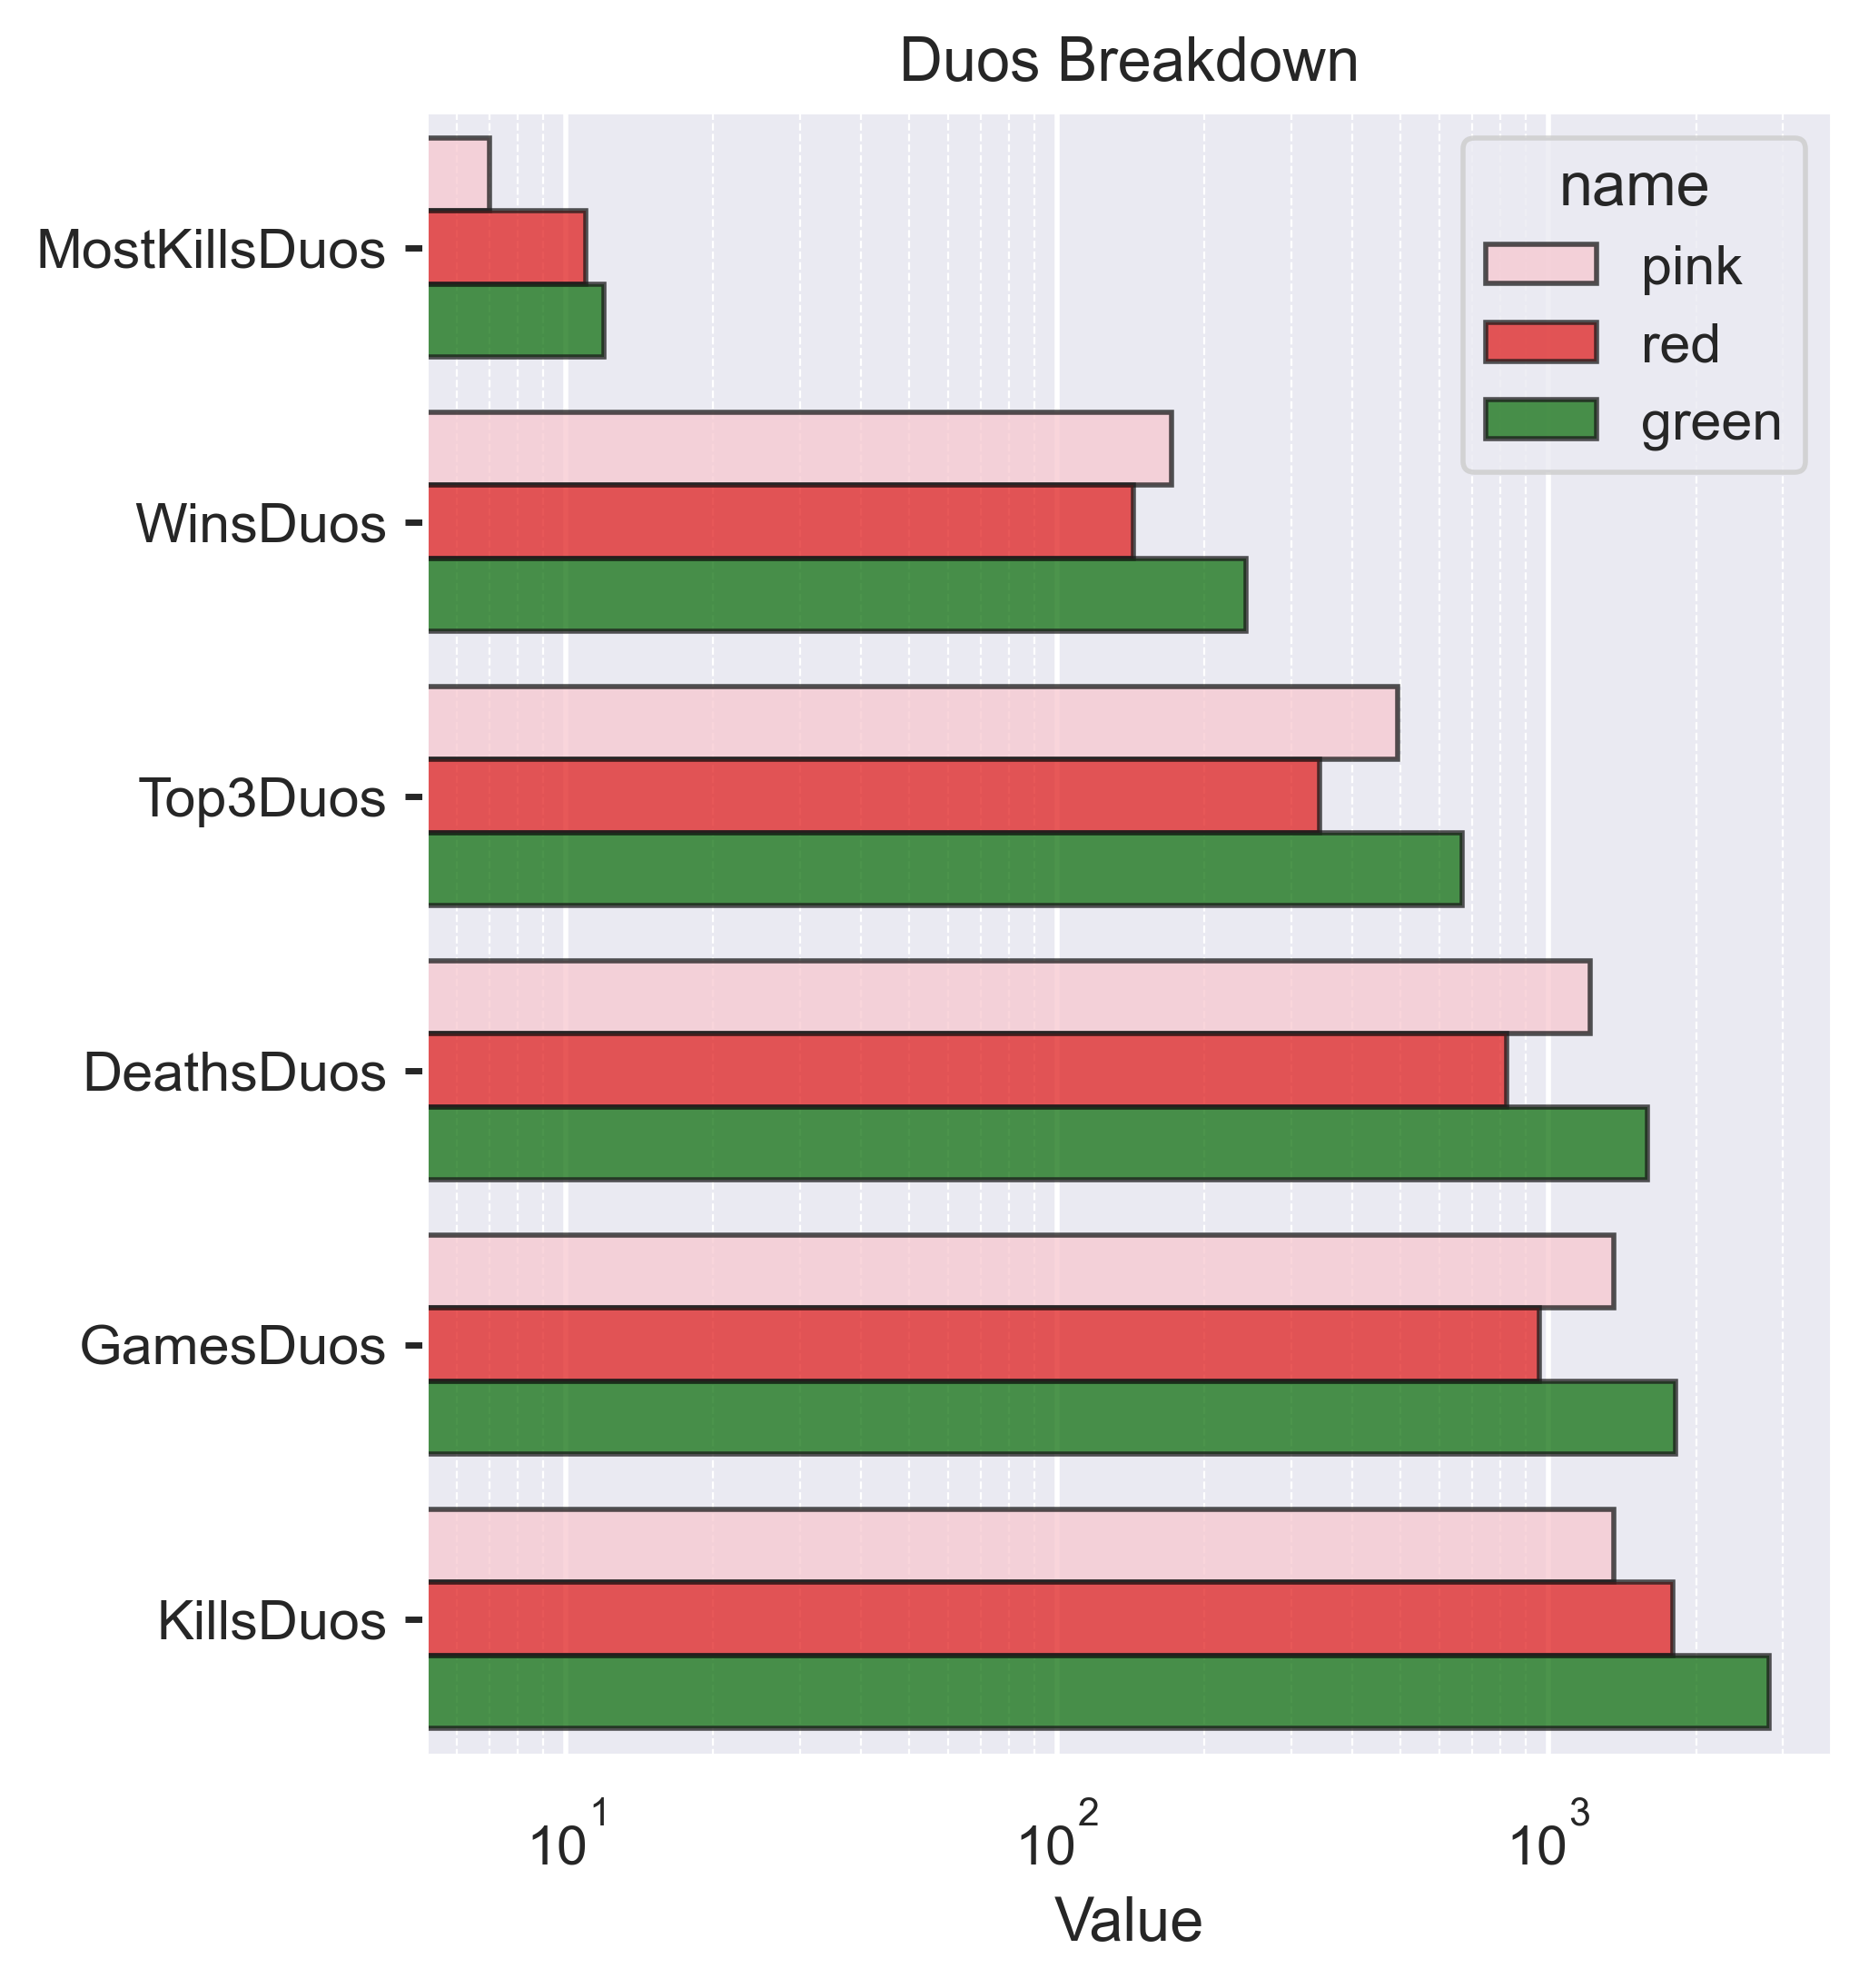

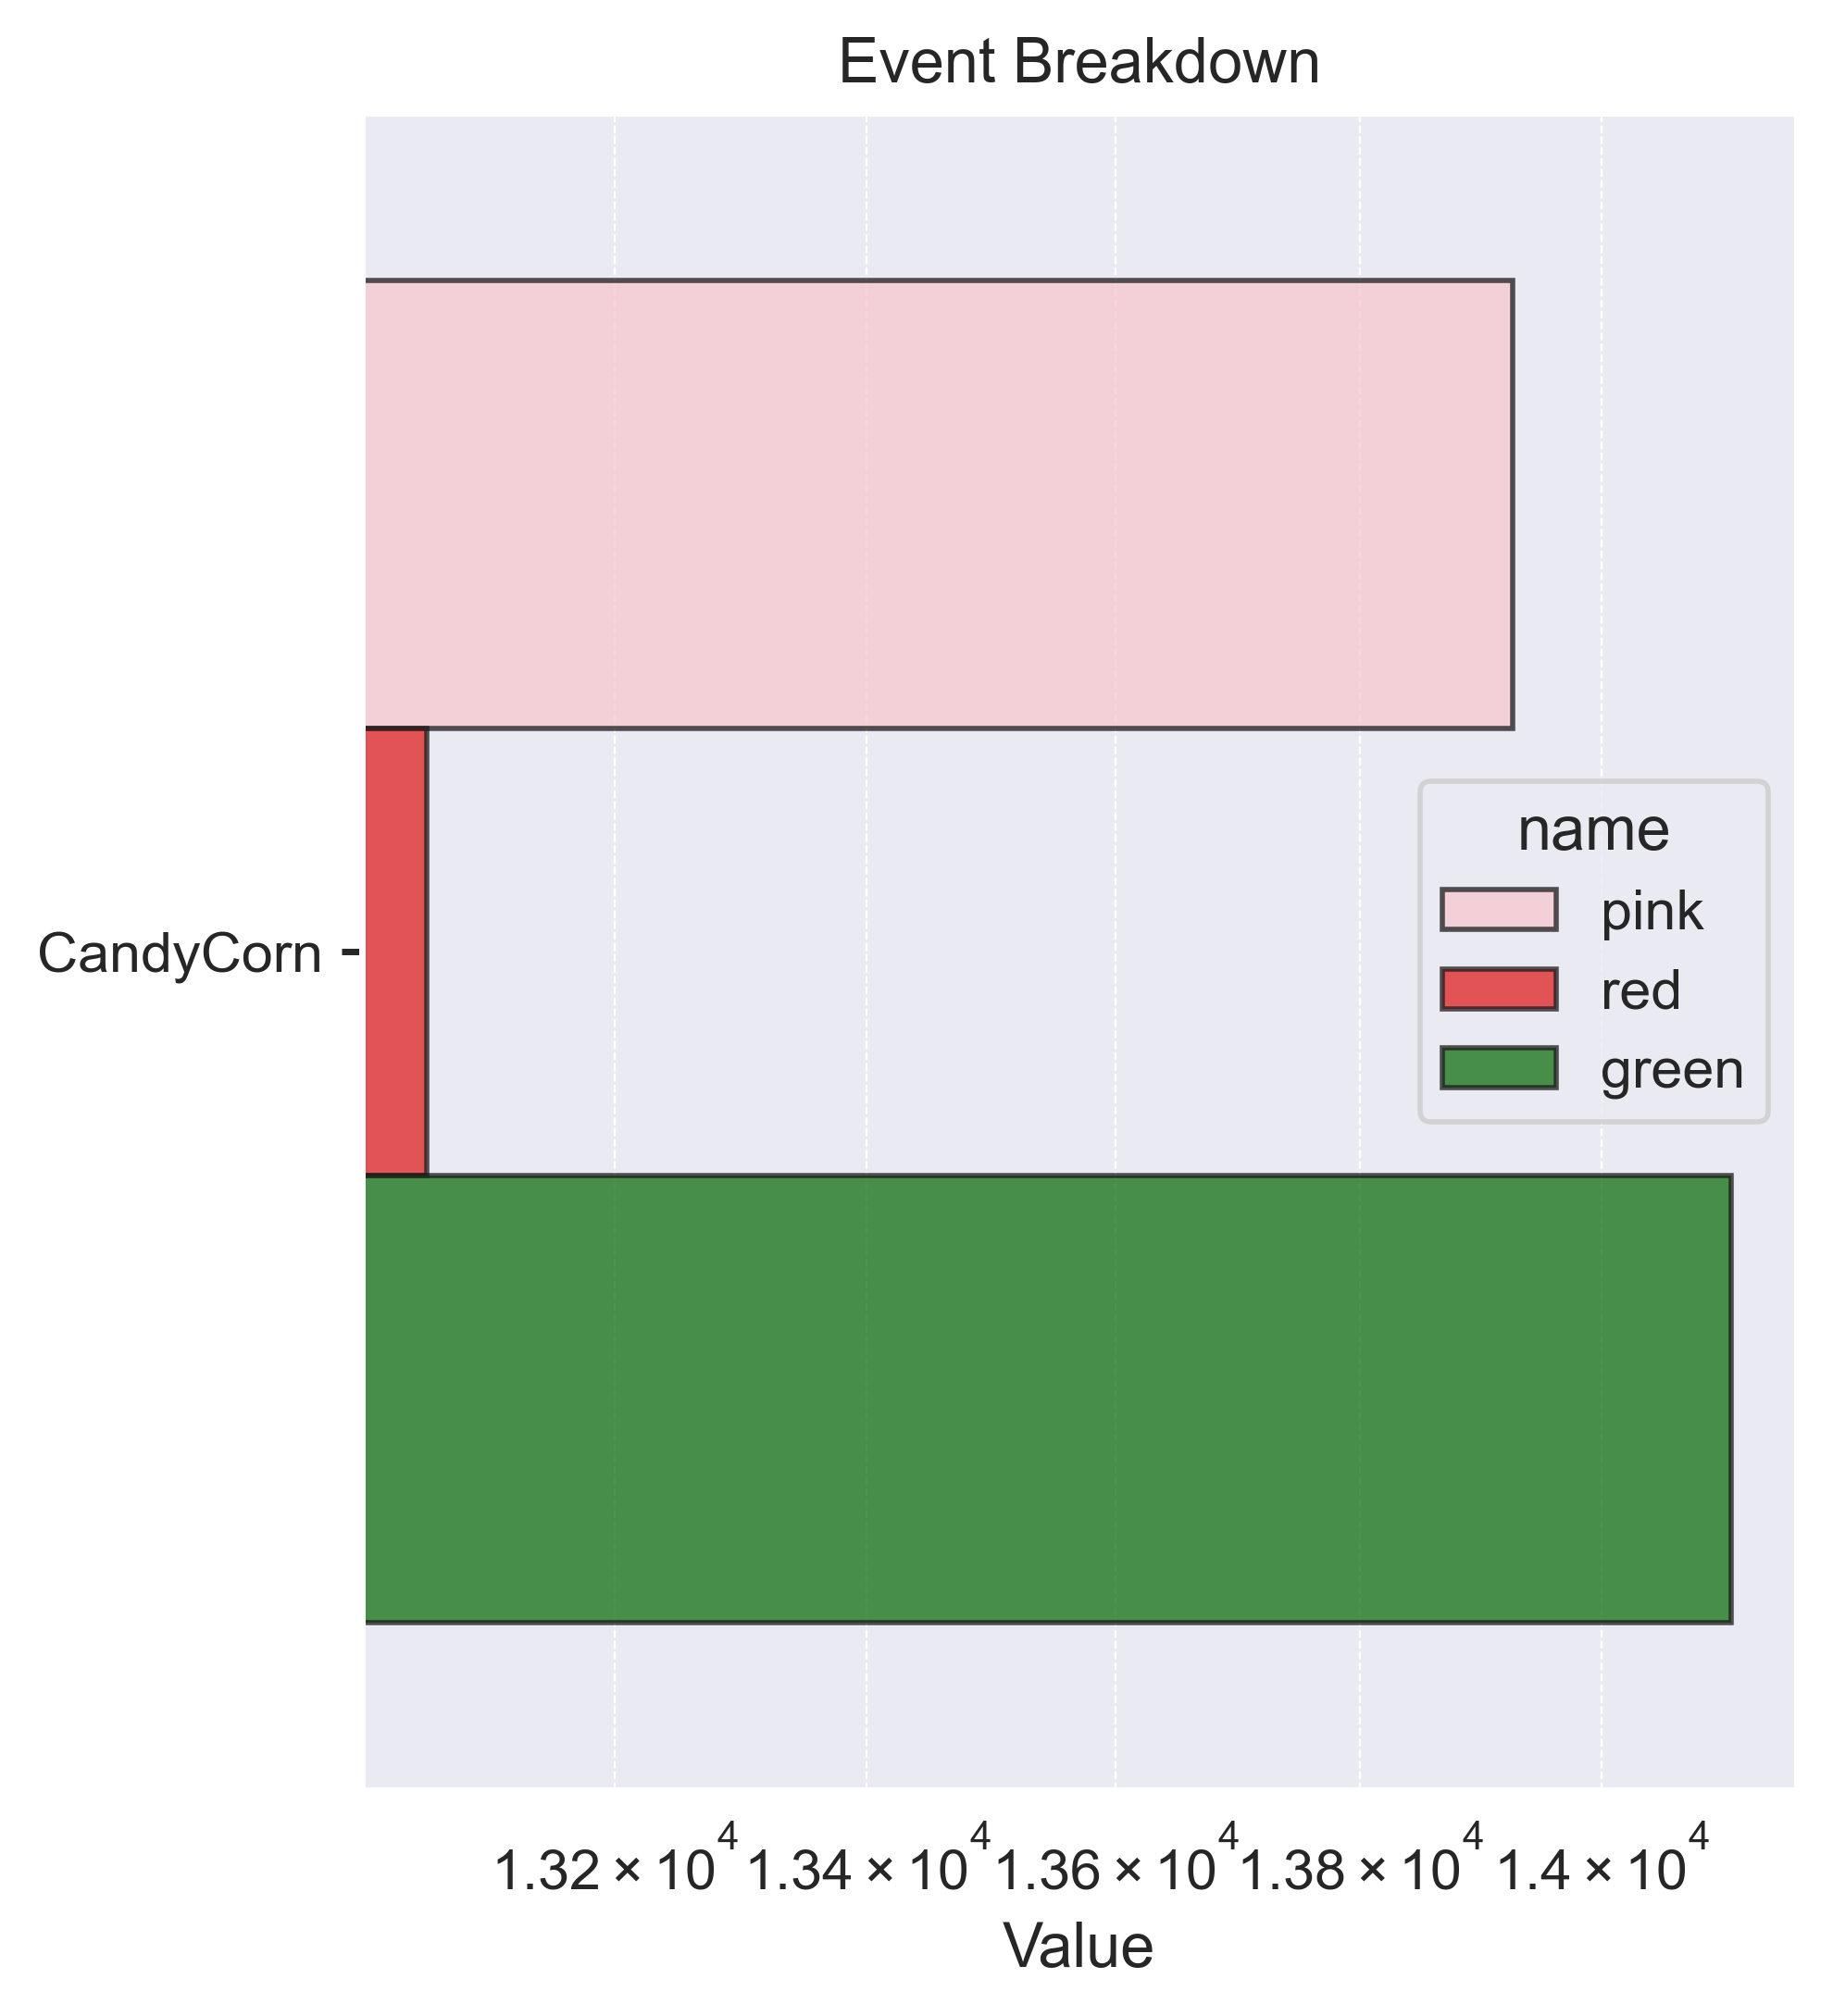

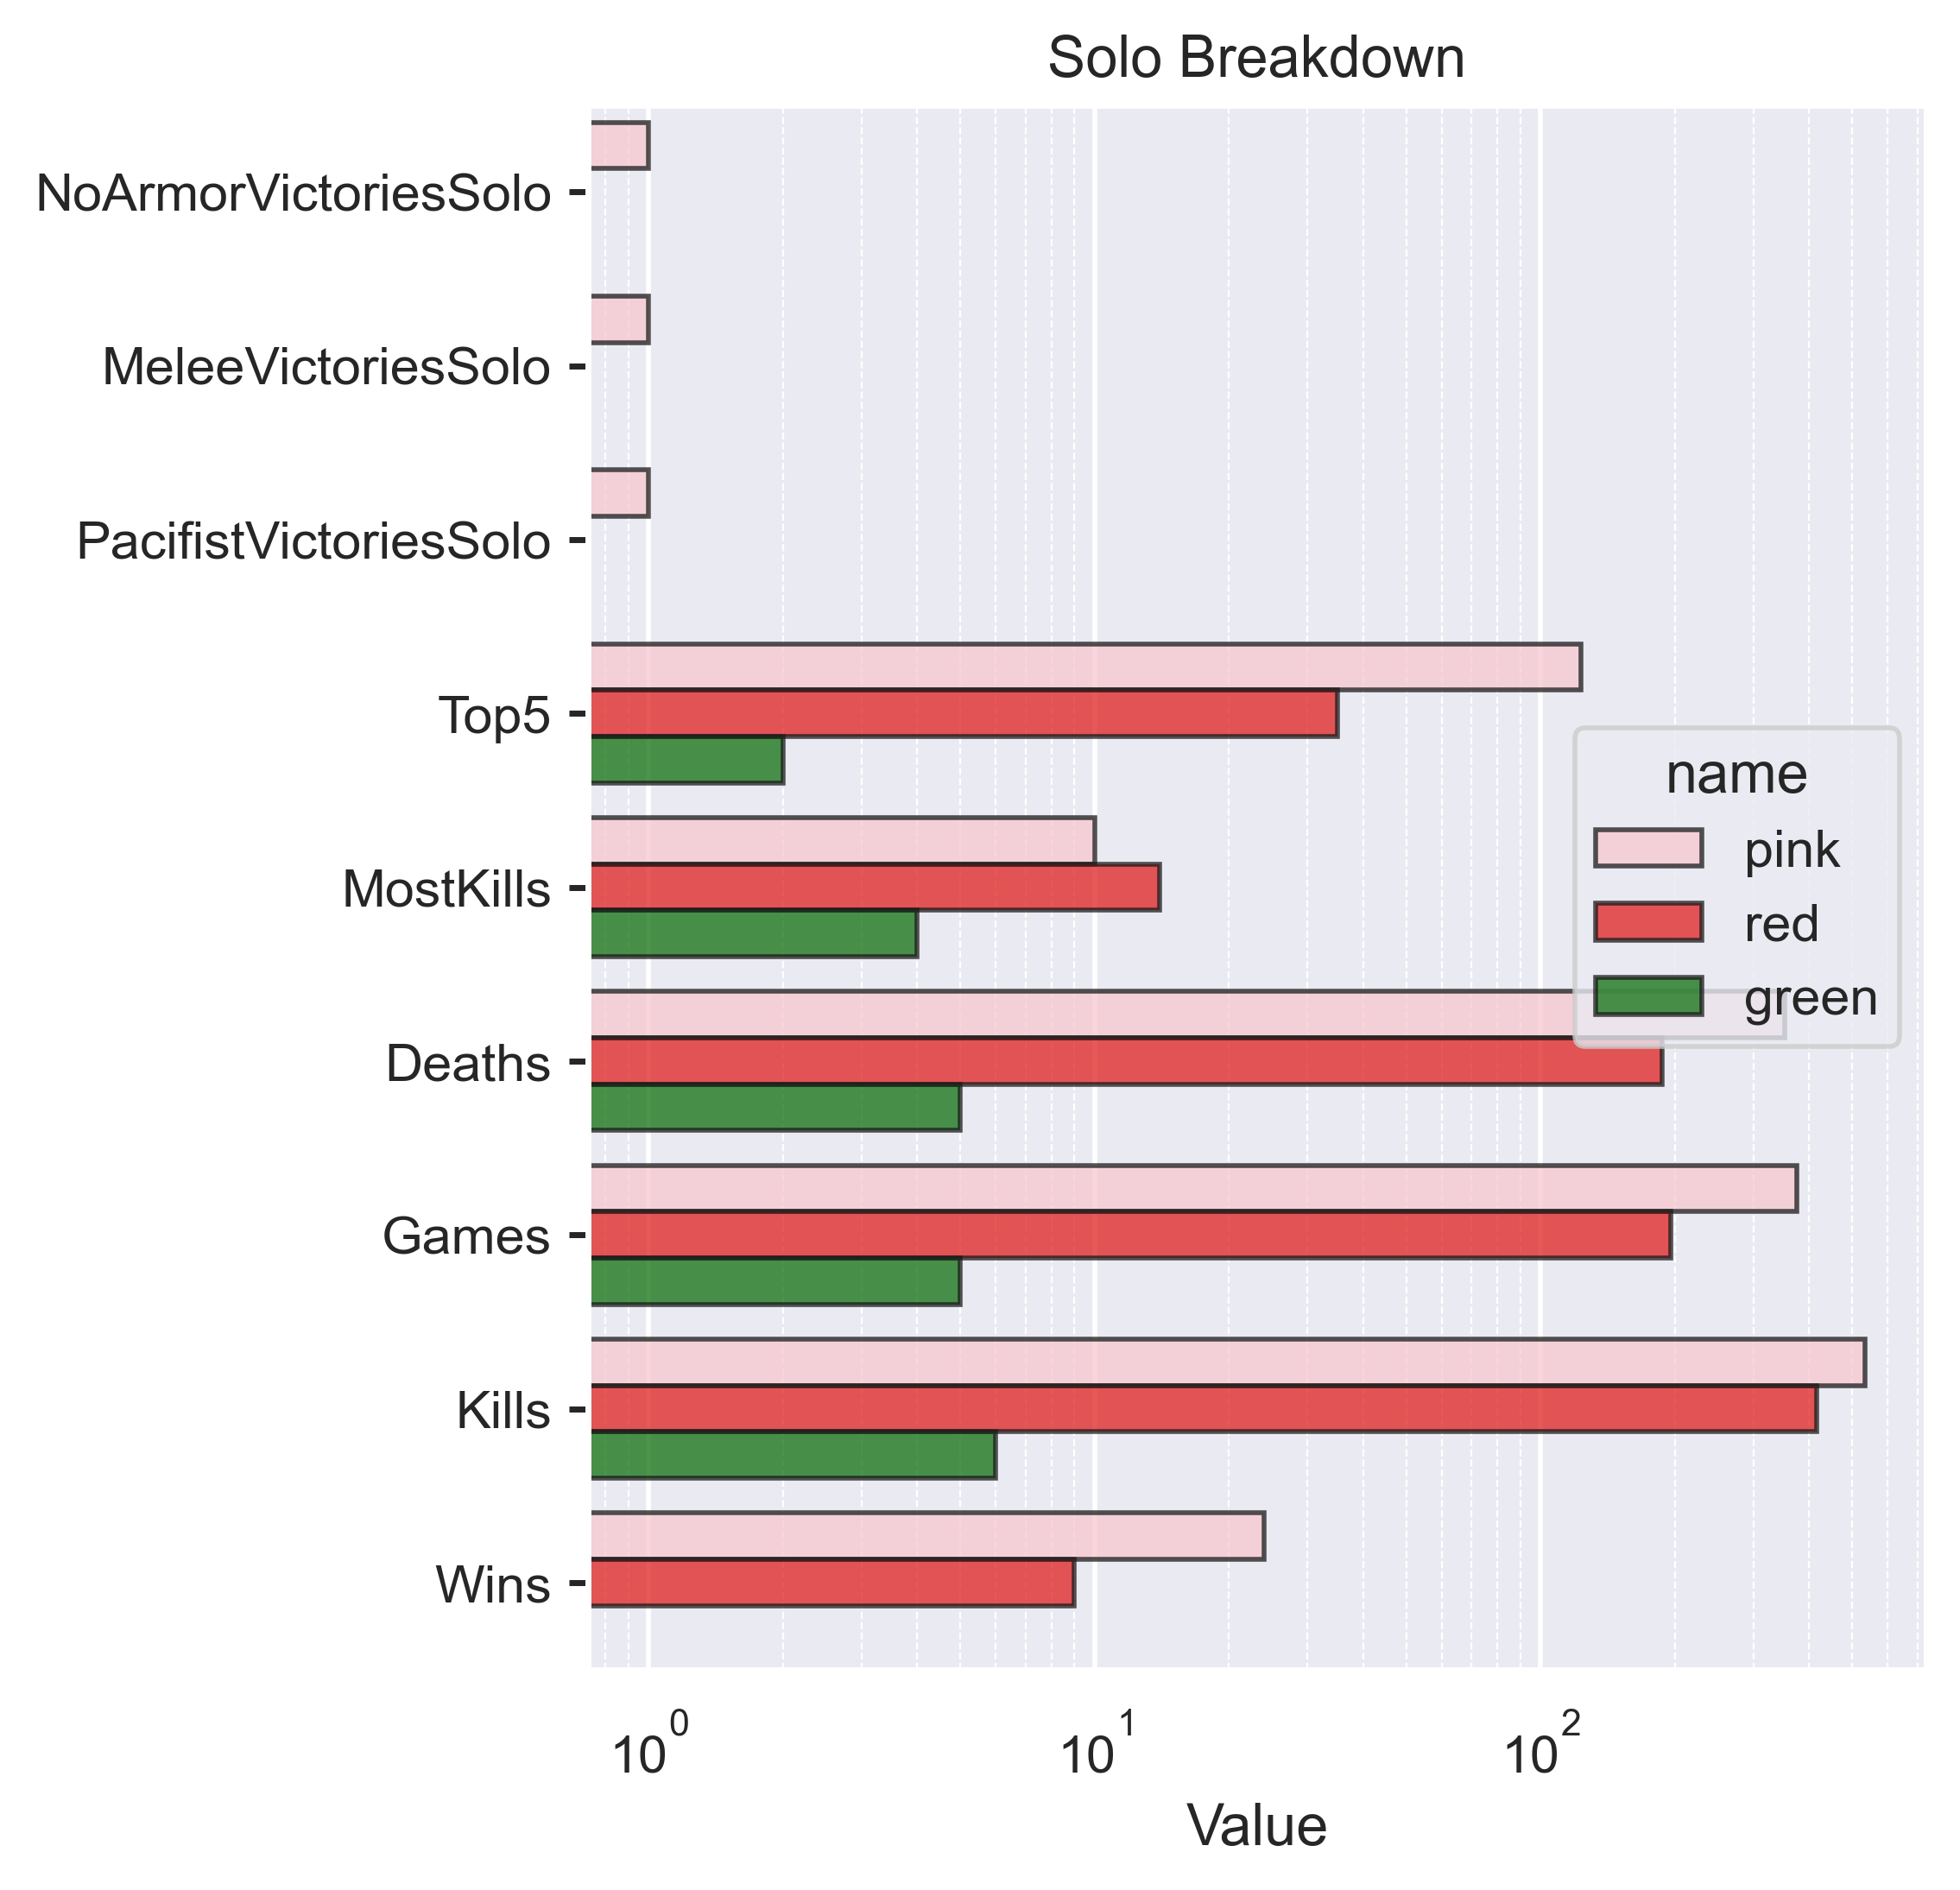

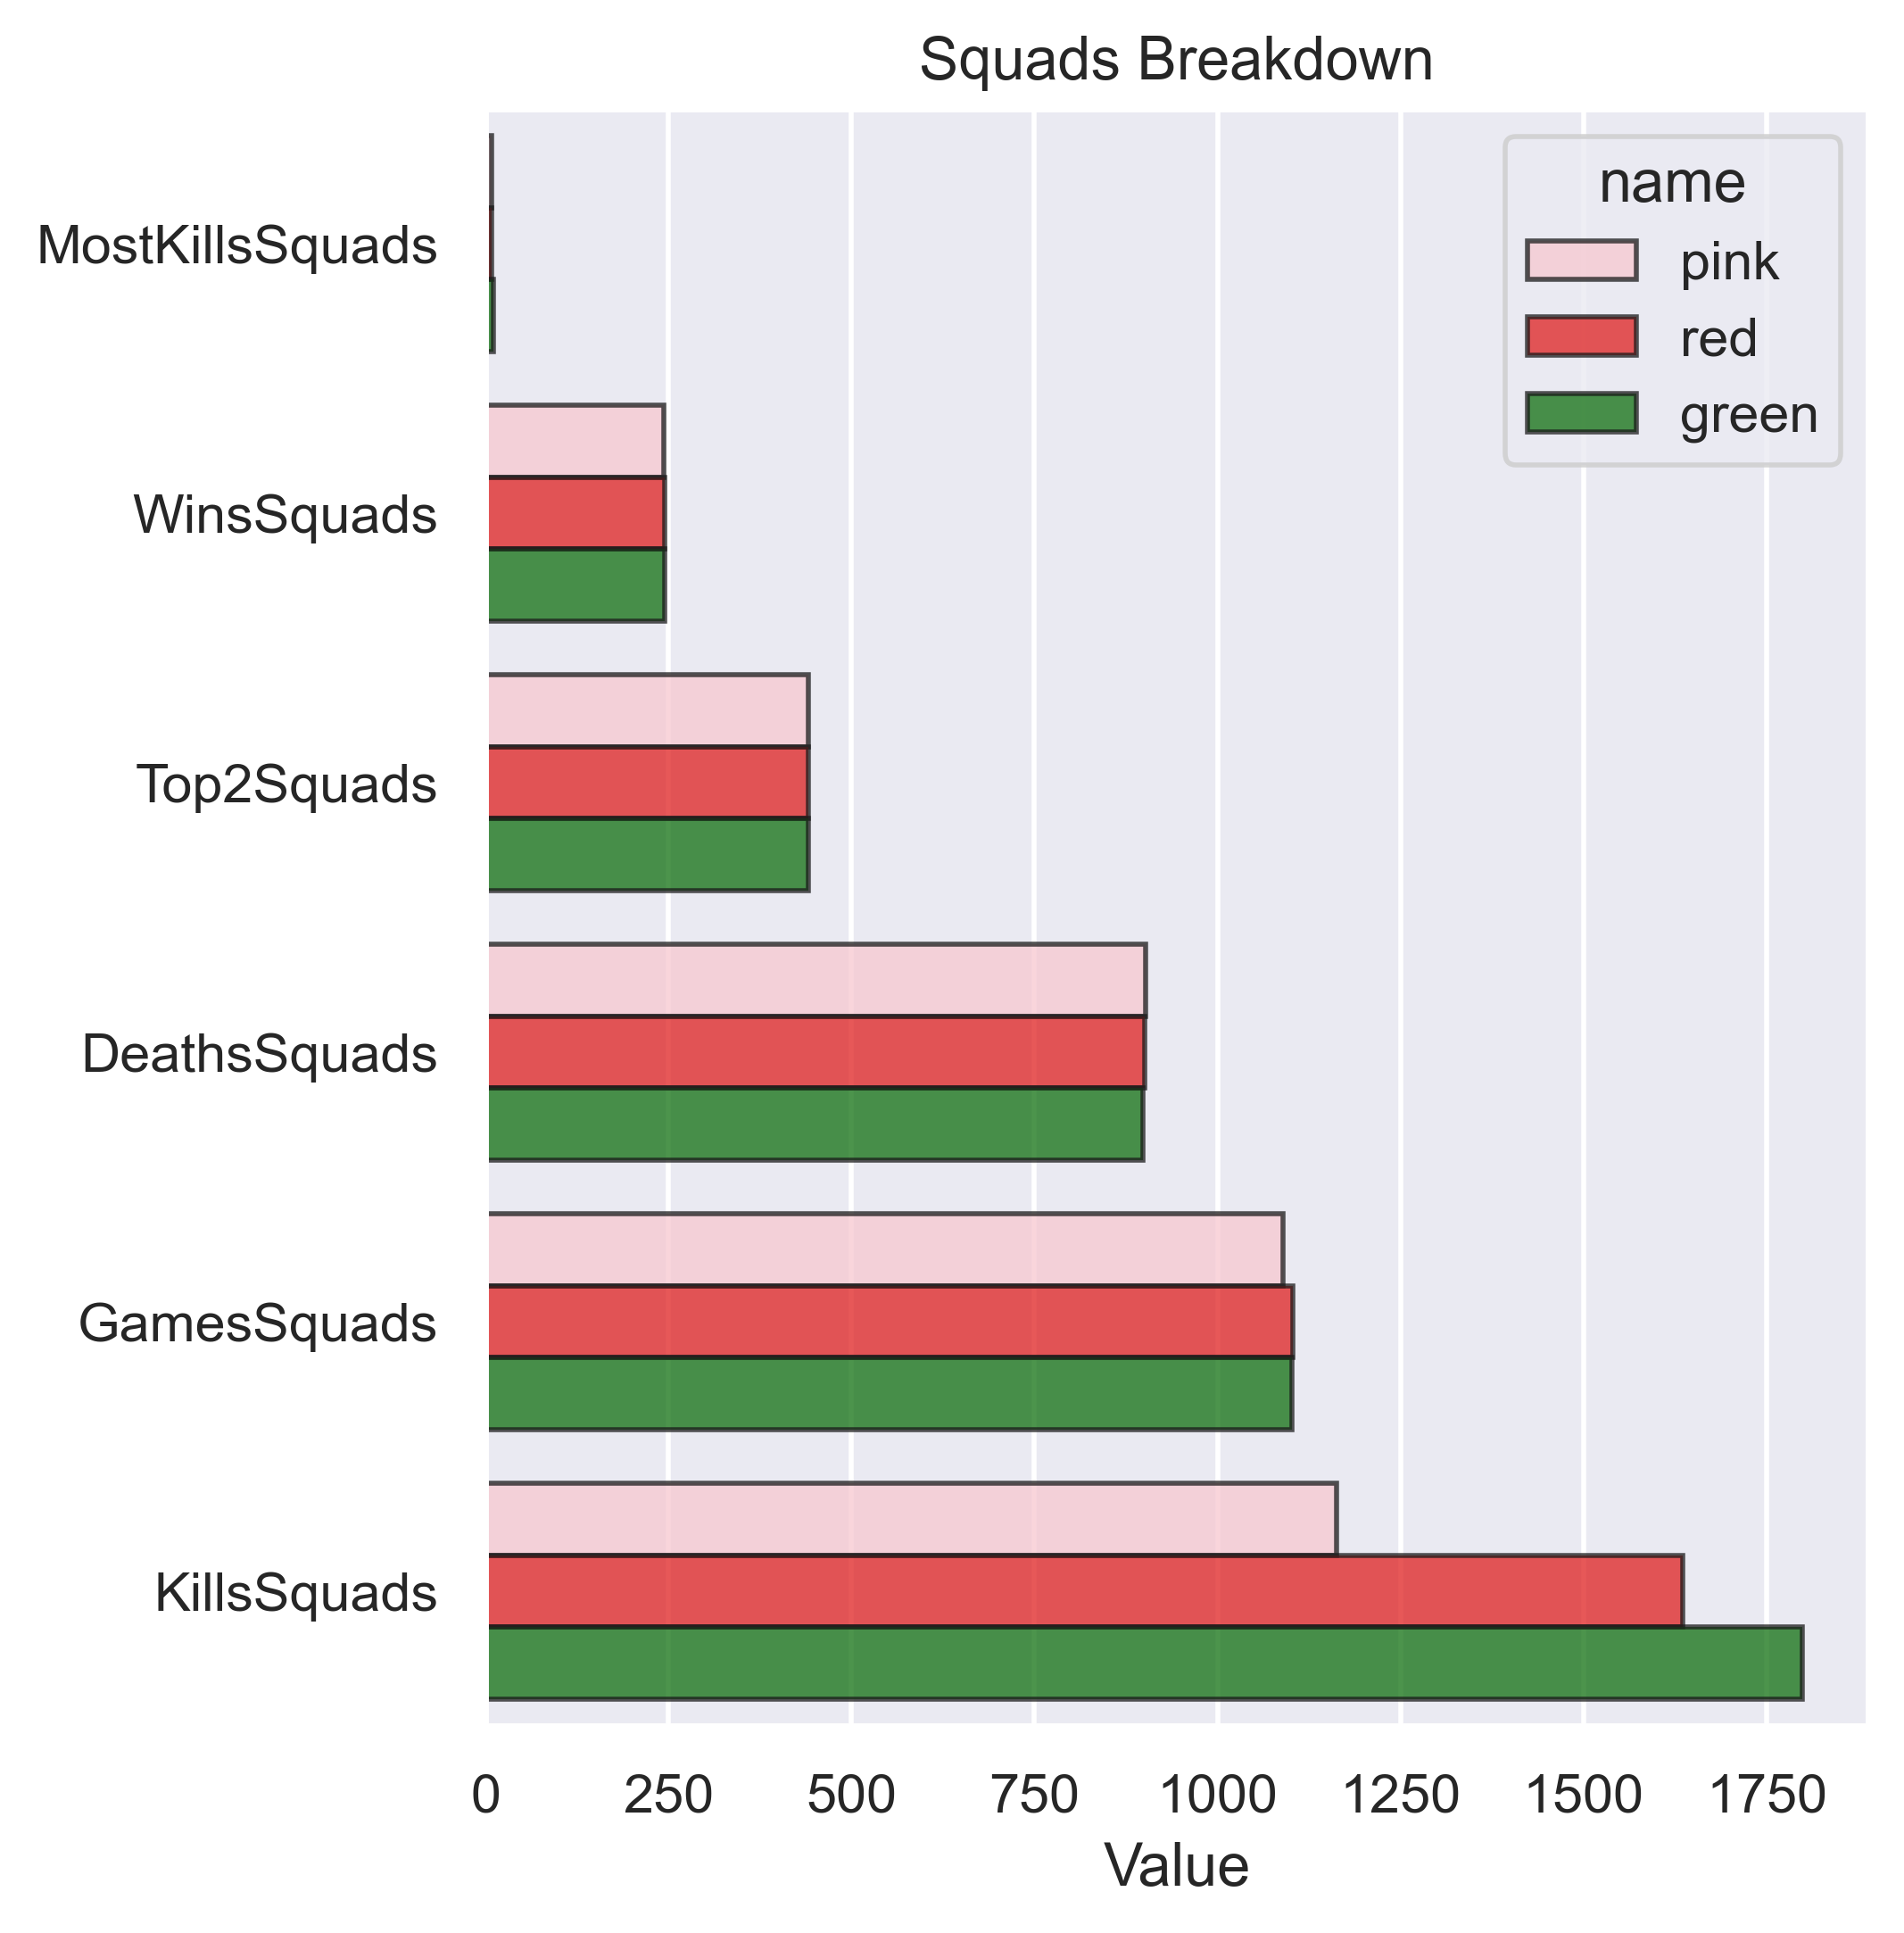

In [14]:
gen_plots(merged)